# This model contains only pyramidal neurons in EC3, CA3, CA1. 


* CA1 model has been fitted to data (Ferguson et al.,2015).
* EC3 model has been fitted by me
* Pyramidal for CA3 has been fitted to data (Siva Venkadesh models)
* LTP has been activated at the EC3-CA1 synapses

In [121]:
# import required libraries
import numpy as np
from brian2 import *
import pylab

# allows plotting inline

%matplotlib inline 

In [122]:
# start virtual oscilloscope to record shit

start_scope()

### intial stuff

In [123]:
# leave this as is. This is for checking our model everytime.
CA1_size = 100 # how pyramidal many neurons in CA1
CA3_size = 100 # how pyramidal many neurons in CA3
EC3_size = 100 # how pyramidal many neurons in EC3



# 1. Models

### This is a weakly adapting CA1 pyramidal model (izhikevich) taken from Ferguson et al (2015)

* The first weakly adapting model from Ferguson (2015)
* V<sub>r</sub> =  -61.8 mV
* V<sub>t</sub> =  -57.0 mV
* c = -65.8mV
* d = 5  pA 
* a = 0.001/ms
* b = 3 * nsiemens
* V<sub>peak</sub> =  22.6 mV
* k<sub>low</sub> = .5 nS/mV 
* k<sub>high</sub> =  3.3 nS/mV
* I<sub>shift</sub> = -45 pA

In [124]:
# CA1 pyramidal neuron parameters.  
CA1_a = 0.001/ms
CA1_b = 3 * nsiemens
CA1_c = -65.8 *mV
CA1_d = 5  *pA #I think I shoudl use pico amps for this.. seriously 
CA1_theta_reset = 22.6 * mV # this is v_peak. There is no such thing as a firing threshold. 
CA1_v_r = -61.8 # mV
CA1_v_t = -57.0 # mV 
CA1_C = 300 * pF
CA1_k_low = .5 * nsiemens/mV
CA1_k_high = 3.3 * nsiemens/mV

CA1_I_shift = -45 *pA

# channel stuff
E_syn = 0 *mV # the equilibrium potential of the synapse
tau_decay = 2 *ms
g_jump = 10*nS

#the quadratic terms based on v_r and v_t
CA1_v_a = 1   /(ms*mV)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  #/(ms*mV)
CA1_v_b = -1*(CA1_v_r + CA1_v_t) /ms#/ms
CA1_v_c = (CA1_v_r * CA1_v_t) *(mV/ms)#*mV/ms 
# Standard Izhikevich neuron equations.  
CA1_p_eqs = '''

dv/dt = ((k*(mV/nS)*(CA1_v_a*(v**2) + CA1_v_b*(v) + CA1_v_c))*pF/CA1_C - u/CA1_C + I/CA1_C + CA1_I_shift/CA1_C ) : volt
du/dt = CA1_a*(((CA1_b)*(v - CA1_v_r*mV)) - u) : amp
I = CA1_input(t,i): amp

k = (v<(-57.0 * mV))*CA1_k_low+(v>=(-57.0 *mV))*CA1_k_high : siemens/volt
''' 
  
CA1_post_spike = '''
v = CA1_c
u += CA1_d
'''




CA1 = NeuronGroup(CA1_size, CA1_p_eqs, threshold='v>CA1_theta_reset', reset = CA1_post_spike) #threshold in this model is the peak threshold
CA1.v = -61.8 * mV

## EC3 pyramidal neuron parameters.  Using average values from neuroelectro

In [125]:

 
EC3_input = np.arange(0,410, 10) 
EC3_input = np.broadcast_to(EC3_input, (1000,41))
EC3_input = TimedArray(EC3_input*pamp, dt=1*ms )

# EC3 pyramidal neuron parameters.  
EC3_a = .00001/ms
EC3_b = 2 * nsiemens
EC3_c = -74.153 *mV
EC3_d = 5 *pA #I think I shoudl use pico amps for this.. seriously 
EC3_theta_reset = 7.7 * mV # this is v_peak. There is no such thing as a firing threshold. 
EC3_v_r = -70.9 # mV
EC3_v_t = -56.9 # mV 
EC3_C = 500 * pF
EC3_k_low = .99 * nsiemens/mV
EC3_k_high = 8 * nsiemens/mV
#EC3_I_shift = -35 *pA

#the quadratic terms based on v_r and v_t
EC3_v_a = 1   /(ms*mV)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  #/(ms*mV)
EC3_v_b = -1*(EC3_v_r + EC3_v_t) /ms#/ms
EC3_v_c = (EC3_v_r * EC3_v_t) *(mV/ms)#*mV/ms 
# Standard Izhikevich neuron equations.  
EC3_p_eqs = '''
dv/dt = ((k*(mV/nS)*(EC3_v_a*(v**2) + EC3_v_b*(v) + EC3_v_c))*pF/EC3_C - u/EC3_C + I/EC3_C  ) : volt
du/dt = EC3_a*((EC3_b*(v - EC3_v_r *mV) - u)) : amp
I = EC3_input(t,i): amp
k = (v<(-56.9 * mV))*EC3_k_low+(v>=(-56.9 *mV))*EC3_k_high : siemens/volt
''' 

EC3_post_spike = '''
v = EC3_c
u += EC3_d
'''



EC3 = NeuronGroup(EC3_size, EC3_p_eqs, threshold='v>EC3_theta_reset', reset = EC3_post_spike) #threshold in this model is the peak threshold

## CA3 model
### Using a model from Siva Venkadesh


* CA3c model with transient bursting
* V<sub>r</sub> =  -62.29 mV
* V<sub>t</sub> =  -45.27 mV
* c = -47.37 mV, if this is the reset potential Vmin
* d = 104  pA 
* a = 0.00189/ms
* b = 19.36 * nsiemens
* V<sub>peak</sub> =  17.43 mV
* k = 3.006 nS/mV 
* C<sub>m</sub> = 244 pF


In [126]:
CA3_a = 0.0023 /ms
CA3_b = 3.428  * nsiemens
CA3_c = -47.77 *mV
CA3_d = 112   *pA #I think I shoudl use pico amps for this.. seriously 
CA3_theta_reset = 2 * mV # this is v_peak. There is no such thing as a firing threshold. 
CA3_v_r = -56.777  # mV
CA3_v_t = -36.777 # mV 
CA3_C = 589 * pF
CA3_k_low = 2.571* nsiemens/mV

#the quadratic terms based on v_r and v_t
CA3_v_a = 1   /(ms*mV)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  #/(ms*mV)
CA3_v_b = -1*(CA3_v_r + CA3_v_t) /ms#/ms
CA3_v_c = (CA3_v_r * CA3_v_t) *(mV/ms)#*mV/ms 
# Standard Izhikevich neuron equations.  
CA3_p_eqs = '''
dv/dt = ((CA3_k_low*(mV/nS)*(CA3_v_a*(v**2) + CA3_v_b*(v) + CA3_v_c))*pF/CA3_C - u/CA3_C + I/CA3_C ) : volt
du/dt = CA3_a*(((CA3_b)*(v - CA3_v_r*mV)) - u) : amp
I = CA3_input(t,i): amp
''' 
  
CA3_post_spike = '''
v = CA3_c
u += CA3_d
'''

CA3 = NeuronGroup(CA3_size, CA3_p_eqs, threshold='v>CA3_theta_reset', reset = CA3_post_spike) #threshold in this model is the peak threshold

# 2. Simulation Network
### nothing is connected yet. Just Basic tests

In [127]:

EC3_state = StateMonitor(EC3,('v'), record=True)
CA1_state = StateMonitor(CA1,('v','u'), record=True)
CA3_state = StateMonitor(CA3, 'v', record=True)
CA1_spikes = SpikeMonitor(CA1)
EC3_spikes = SpikeMonitor(EC3)
CA3_spikes = SpikeMonitor(CA3)
sim = Network(collect())
sim.store('not_connected')


# creating a channel



In [128]:
current = np.linspace(0,1000,100) 
current = np.broadcast_to(current, (1000,100))
testing_currents = current
current = TimedArray(current*pamp, dt=1*ms )
EC3_input = current
CA3_input =  current
CA1_input = current

In [129]:
sim.restore('not_connected')
duration = 1*second
sim.run(1000*ms)

INFO       No numerical integration method specified for group 'neurongroup_6', using method 'euler' (took 0.02s, trying other methods took 0.04s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_7', using method 'euler' (took 0.02s, trying other methods took 0.04s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_8', using method 'euler' (took 0.01s, trying other methods took 0.03s). [brian2.stateupdaters.base.method_choice]


In [130]:
CA1_freq = np.zeros(100)
CA3_freq = np.zeros(100)
EC3_freq = np.zeros(100)

In [131]:
# this computes steady state frequency --  the last ISI

for i in range(0,100):
    test = CA1_spikes.spike_trains()
    if len(test[i]) > 1:
        CA1_freq[i] = 1/(test[i][len(test[i])-1] - test[i][len(test[i])-2])
    else:
        pass
    
for i in range(0,100):
    test = CA3_spikes.spike_trains()
    if len(test[i]) > 1:
        CA3_freq[i] = 1/(test[i][len(test[i])-1] - test[i][len(test[i])-2])
    else:
        pass    

for i in range(0,100):
    test = EC3_spikes.spike_trains()
    if len(test[i]) > 1:
        EC3_freq[i] = 1/(test[i][len(test[i])-1] - test[i][len(test[i])-2])
    else:
        pass    

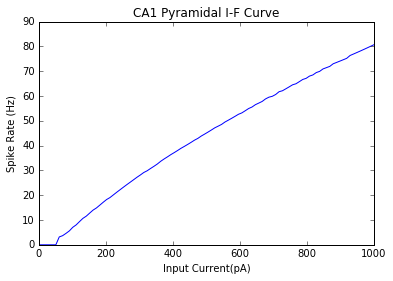

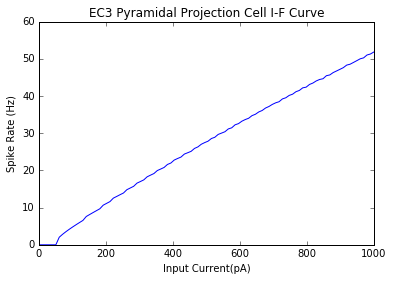

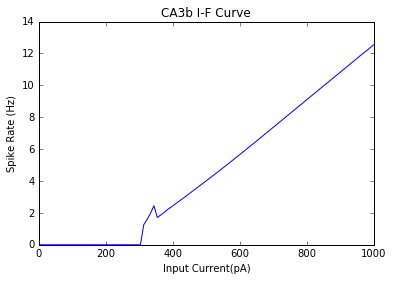

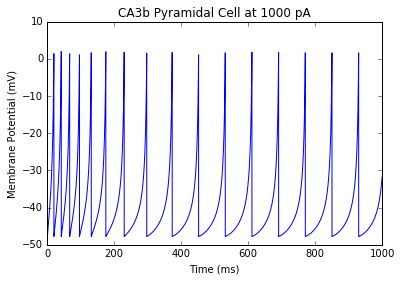

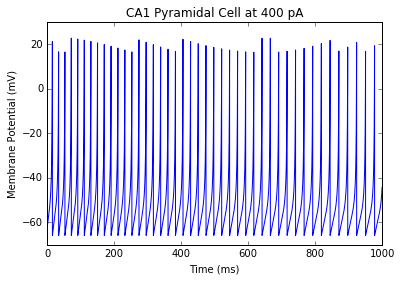

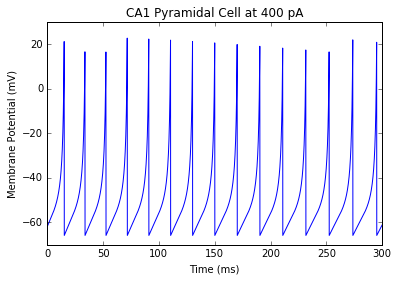

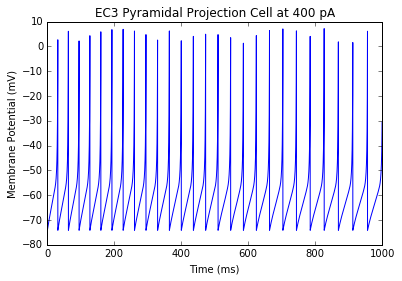

In [132]:


%matplotlib inline
pylab.ylabel('Spike Rate (Hz)')
pylab.xlabel('Input Current(pA)')
pylab.plot(testing_currents[0,:],CA1_freq[:])#CA1_spikes.count[:]) #a_list
pylab.title('CA1 Pyramidal I-F Curve')
pylab.show()

pylab.plot(testing_currents[0,:],EC3_freq[:])#EC3_spikes.count[:])
pylab.title('EC3 Pyramidal Projection Cell I-F Curve')
pylab.ylabel('Spike Rate (Hz)')
pylab.xlabel('Input Current(pA)')
pylab.show()

pylab.plot(testing_currents[0,:],CA3_freq[:]) #(CA3_spikes.count[:])
pylab.title('CA3b I-F Curve')
pylab.ylabel('Spike Rate (Hz)')
pylab.xlabel('Input Current(pA)')
pylab.show()

pylab.plot(CA3_state.t/ms,CA3_state.v[99]*1000) # 50 corresponds to ~500pA current
pylab.title('CA3b Pyramidal Cell at 1000 pA')
pylab.xlabel('Time (ms)')
pylab.ylabel('Membrane Potential (mV)')
pylab.show()

pylab.plot(CA1_state.t/ms,CA1_state.v[40]*1000)
pylab.title('CA1 Pyramidal Cell at 400 pA')
pylab.xlabel('Time (ms)')
pylab.ylabel('Membrane Potential (mV)')
pylab.show()

pylab.plot(CA1_state.t/ms,CA1_state.v[40]*1000)
pylab.title('CA1 Pyramidal Cell at 400 pA')
pylab.xlabel('Time (ms)')
pylab.ylabel('Membrane Potential (mV)')
pylab.xlim(0,300)
pylab.show()


pylab.plot(EC3_state.t/ms,EC3_state.v[40]*1000)
pylab.title('EC3 Pyramidal Projection Cell at 400 pA')
pylab.xlabel('Time (ms)')
pylab.ylabel('Membrane Potential (mV)')
pylab.show()

In [133]:
sim.restore('not_connected')

## Create Synapses on CA1 neuron

In [134]:
# properties of the synapse
E_syn = 0 *mV # the equilibrium potential of the synapse
tau_decay_ampa = 8 *ms
EC3_g_jump = 2*nS # this is supposed to be an NMDA channel
CA3_g_jump = 10*nS

B_2 =  80
B_1 = 80
alpha_2 = .55
alpha_1 = .35

# Change CA1 model to include synaptic current Isyn and exclude constant DC input
CA1_eqs_synapse = '''
dv/dt = ((k*(mV/nS)*(CA1_v_a*(v**2) + CA1_v_b*(v) + CA1_v_c))*pF/CA1_C - u/CA1_C +   CA1_I_shift/CA1_C - I_syn_distal/CA1_C  - I_syn_proximal/CA1_C ): volt
du/dt = CA1_a*(((CA1_b)*(v - CA1_v_r*mV)) - u) : amp
k = (v<(-57.0 * mV))*CA1_k_low+(v>=(-57.0 *mV))*CA1_k_high : siemens/volt


I_syn_distal = g_syn_EC3*(v - E_syn): amp
I_syn_proximal = g_syn_CA3*(v - E_syn): amp
dg_syn_CA3/dt = -g_syn_CA3 / tau_decay_ampa : siemens
dg_syn_EC3/dt = -g_syn_EC3 / tau_decay_ampa : siemens


a = .062/mV: 1/volt
gbar_syn = .00000001*siemens : siemens
tau_rise = 2 *ms : second
tau_decay = 50 *ms : second
tpeak = (tau_decay * tau_rise)/(tau_decay - tau_rise) * log(tau_decay/tau_rise) : second
f = (tau_decay - tau_rise)/(tau_rise*tau_decay*(-exp(-tpeak/tau_rise) + exp(-tpeak/tau_decay)))/becquerel : 1
h0 = 1 : 1
NMDA_g_syn = gbar_syn * f * g : siemens 
dg/dt = -g/tau_decay + h*becquerel : 1
dh/dt = -h/tau_rise : 1




I_NMDA = NMDA_g_syn * (1/(1+exp(-a*v)/3.57))*(v - E_syn): amp
dCa/dt = (I_NMDA/amp - second*(1/(50*ms))*Ca)/second: 1
Omega = .25 + exp(B_2*(Ca-alpha_2))*(1+exp(B_2*alpha_2)) - .25*exp(B_1*(Ca-alpha_1))*(1+exp(B_1*alpha_1))

'''
CA1_post_action= '''
g_syn_EC3 += EC3_g_jump*w
h += 1
'''
CA1 = NeuronGroup(CA1_size, CA1_eqs_synapse, threshold='v>CA1_theta_reset', reset = CA1_post_spike)
EC3_CA1 = Synapses( EC3,CA1,'w:1', on_pre = CA1_post_action)
CA3_CA1 = Synapses( CA3,CA1,'w:1', on_pre ='g_syn_CA3 += CA3_g_jump*w')
#EC3_CA1.connect(j='i')
CA1_state = StateMonitor(CA1,('v','g_syn_EC3','g_syn_CA3','u','Ca','I_NMDA', 'NMDA_g_syn','Omega'), record=True)#,'Ca','I_NMDA', 'NMDA_g_syn')
CA1_spikes = SpikeMonitor(CA1)

## Connect CA3 to CA1 +  Connect EC3 to CA1

* In the random version of the model, these connections will be random, with a given probability
* Specifically, connections from EC3 to CA1 will be random
* Connections from CA3 to CA1 will also be random

In [135]:

EC3_CA1.connect(condition = 'abs(i-j)<8') # random all to all connections #i=np.arange(0,100,1), j=np.arange(0,100,1)) # 

CA3_CA1.connect( condition = 'abs(i-j)<3')#i=np.arange(0,100,1), j=np.arange(0,100,1))


### Set initial synaptic weights 

* Weak random connections for EC3
* Strong random connections for CA3

In [136]:
EC3_CA1.w = np.random.uniform(low=.1, high =.2,size= len(EC3_CA1.w))
print 'There are {} EC3-CA1 synapses' .format(len(EC3_CA1.w))

CA3_CA1.w = np.random.uniform(low=.6,high=.8, size = len(CA3_CA1.w))
print 'There are {} CA3-CA1 synapses' .format(len(CA3_CA1.w))

There are 1444 EC3-CA1 synapses
There are 494 CA3-CA1 synapses


In [137]:
# a function to visualise connectivity. I didn't come up with this (Brian2). 

def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(22, 10))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=10)
    plot(ones(Nt), arange(Nt), 'ok', ms=10)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')


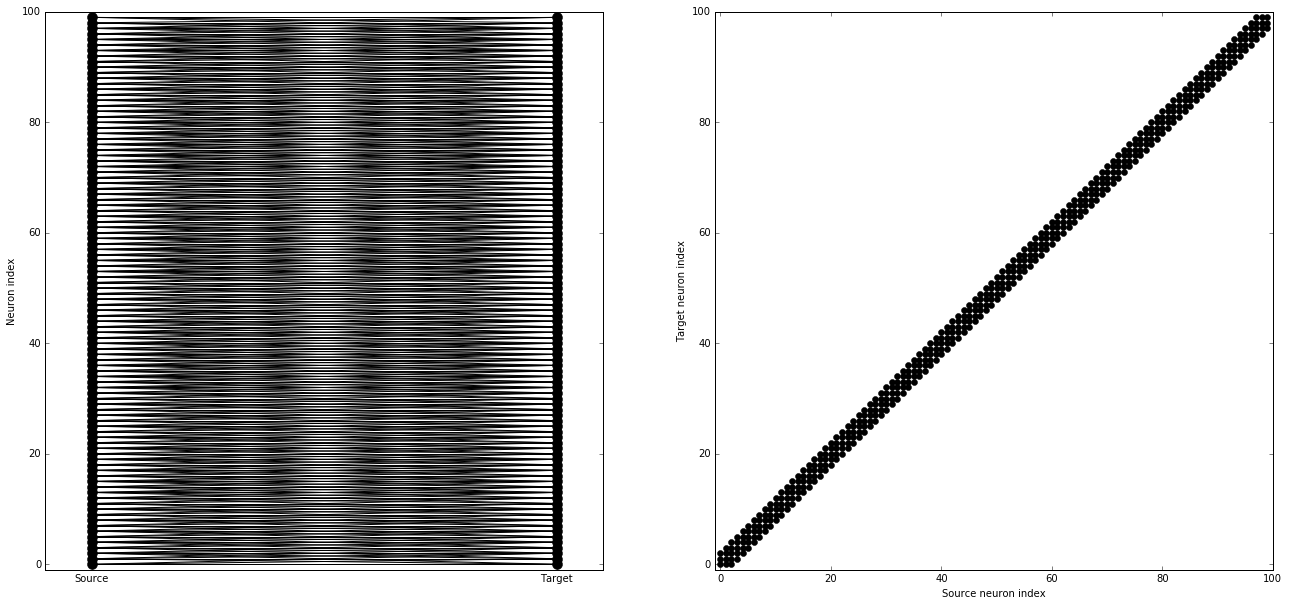

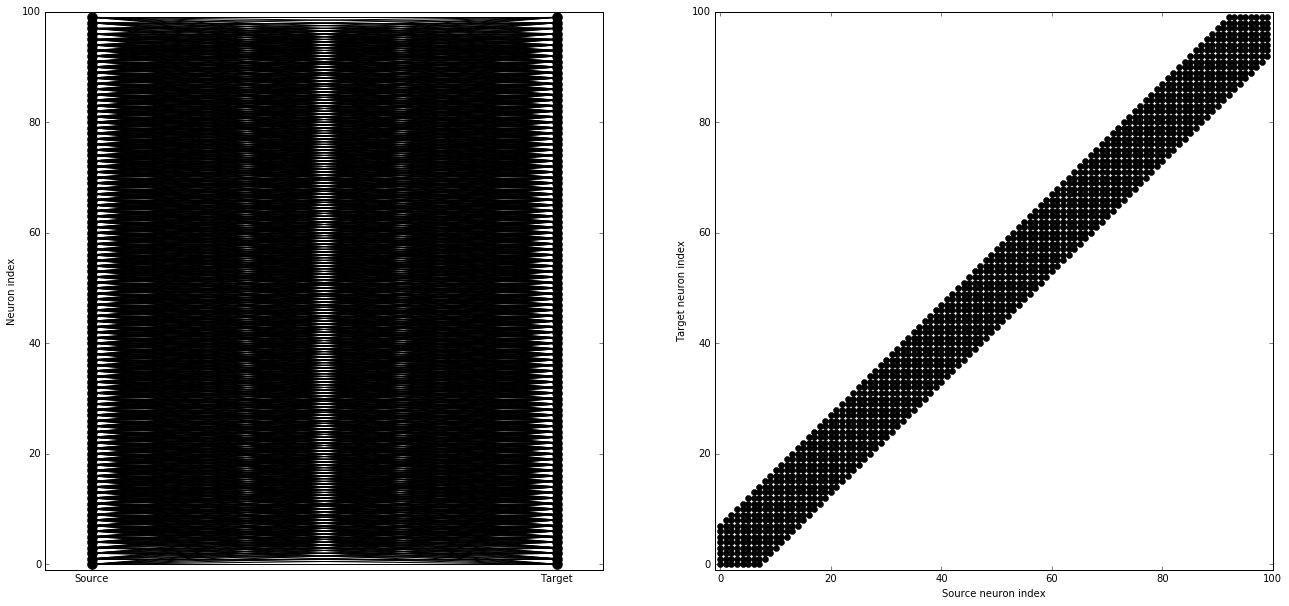

In [138]:
visualise_connectivity(CA3_CA1)
visualise_connectivity(EC3_CA1)

In [139]:
# a weirdness about brian2, you have to add objects to the network even if you just 'update' them
sim.add(EC3_CA1, CA1_state,CA1_spikes, CA1, CA3_CA1) 

# 3. Input from the environment
## stimulus components is received as 'chunks' in an array

In [140]:
# for presentation of a stimulus A, we have a vector:
feature_array =  [1,1,1,1,0,0,0,0,0,0]# the 'ones' can represent stimuli

EC3_input_intensity = 500 
CA3_input_intensity = 1500


## EC3 input algorithm

In [141]:


EC3_input = EC3_input_intensity * np.kron(feature_array, np.random.uniform(.8,1, (1,(EC3_size//len(feature_array))))) # rescales the input vector

#map(np.random.shuffle,EC3_input) # we just need to remove this to make the inputs deterministic


EC3_input = np.repeat(EC3_input,10000,axis=0) # full duration EC3 input array

EC3_input = TimedArray(EC3_input*pamp, dt=1*ms )
EC3 = NeuronGroup(EC3_size, EC3_p_eqs, threshold='v>EC3_theta_reset', reset = EC3_post_spike)
EC3_state = StateMonitor(EC3,('v','u'), record=True)
EC3_spikes = SpikeMonitor(EC3)
sim.add(EC3,EC3_state,EC3_spikes)
print EC3_input 

## CA3 input algorithm
### Samples from a beta distribution

* CA3's activity pattern is always random. Even in the deterministic model. This is because of CA3's role in generating orthogonal vectors. Orthogonal vectors have to be different every time. 

In [142]:
def CA3_vector():
    global CA3_size
    global CA3_input_intensity
    ortho_CA3 = np.random.beta(1,3,(1,CA3_size))
    CA3_input = CA3_input_intensity*ortho_CA3
    CA3_input = np.broadcast_to(CA3_input,(10000,CA3_size)) # the length of the trial should be a variable here. 
    CA3_input = TimedArray(CA3_input*pamp, dt=1*ms )
    return CA3_input

CA3_input= CA3_vector()



CA3 = NeuronGroup(CA3_size, CA3_p_eqs, threshold='v>CA3_theta_reset', reset = CA3_post_spike) #threshold in this model is the peak threshold
CA3_state = StateMonitor(CA3,('v','u'), record=True)
CA3_spikes = SpikeMonitor(CA3)
sim.add(CA3,CA3_state,CA3_spikes)
sim.store('External inputs added')

# 4. Simulations

## Testing short duration
### With short exposures, there should be minimal activity in CA1 with only EC3 input

In [143]:


sim.restore('External inputs added')
duration = 1*second
sim.run(duration)

INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.02s, trying other methods took 0.04s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_2', using method 'euler' (took 0.01s, trying other methods took 0.03s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_6', using method 'euler' (took 0.02s, trying other methods took 0.04s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_7', using method 'euler' (took 0.02s, trying other methods took 0.04s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_8', using method 'euler' (took 0.01s, trying other methods took 0.03s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specifi

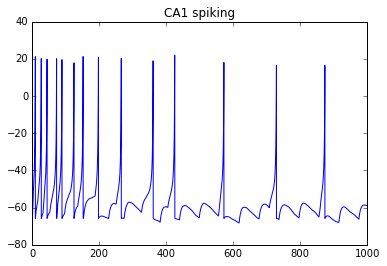

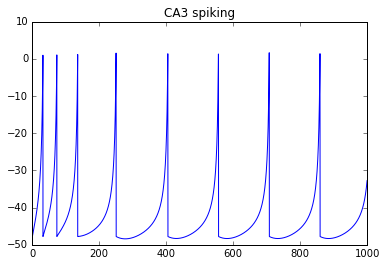

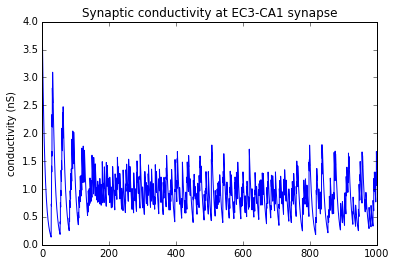

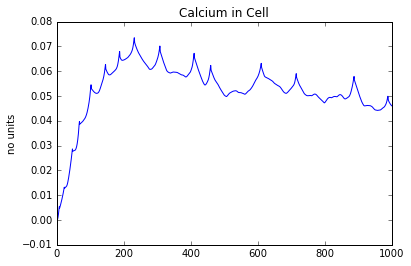

In [149]:
pylab.plot(CA1_state.t/ms,CA1_state.v[1]/mV)
pylab.title('CA1 spiking')
pylab.show()

pylab.plot(CA3_state.t/ms,CA3_state.v[1]/mV)
pylab.title('CA3 spiking')
pylab.show()

pylab.plot(CA1_state.t/ms,CA1_state.g_syn_EC3[5]/nS)
pylab.title('Synaptic conductivity at EC3-CA1 synapse')
pylab.ylabel('conductivity (nS)')
pylab.show()

pylab.plot(CA1_state.t/ms,-1*(CA1_state.Ca[5]/nS))
pylab.title('Calcium in Cell')
pylab.ylabel('no units')
pylab.show()




### Firing rate plots

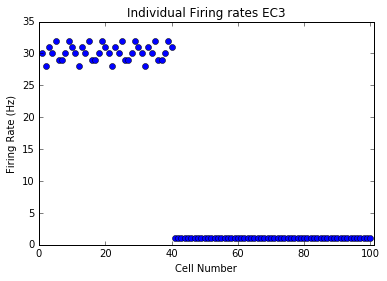

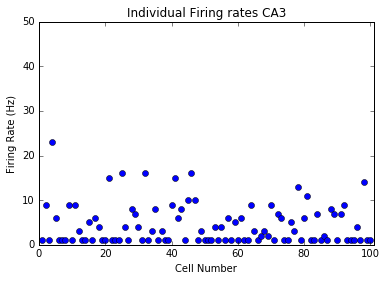

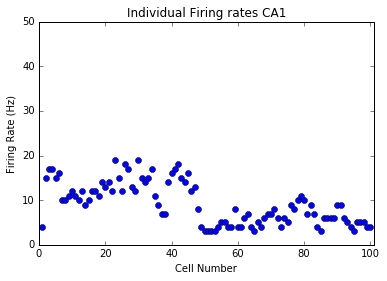

In [145]:
pylab.plot(range(1,len(EC3_spikes.count)+1),EC3_spikes.count, 'bo')
pylab.title('Individual Firing rates EC3')
pylab.xlabel('Cell Number')
pylab.ylabel('Firing Rate (Hz)')
pylab.xlim(0,EC3_size+1)
#pylab.ylim(0,50)
pylab.show()

pylab.plot(range(1,len(CA3_spikes.count)+1),CA3_spikes.count, 'bo')
pylab.title('Individual Firing rates CA3')
pylab.xlabel('Cell Number')
pylab.ylabel('Firing Rate (Hz)')
pylab.xlim(0,CA3_size+1)
pylab.ylim(0,50)
pylab.show()

pylab.plot(range(1,len(CA1_spikes.count)+1),CA1_spikes.count, 'bo')
pylab.title('Individual Firing rates CA1')
pylab.xlabel('Cell Number')
pylab.ylabel('Firing Rate (Hz)')
pylab.xlim(0,CA1_size+1)
pylab.ylim(0,50)
pylab.show()



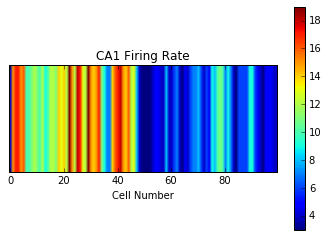

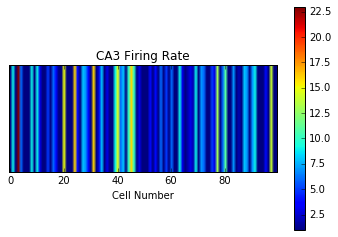

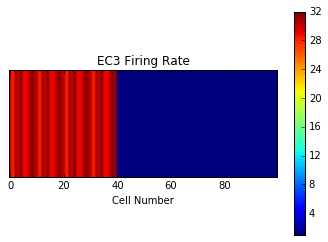

In [146]:
CA1_heatmap = np.broadcast_to(np.asarray(CA1_spikes.count), (2, 100) )
CA3_heatmap = np.broadcast_to(np.asarray(CA3_spikes.count), (2, 100) )
EC3_heatmap = np.broadcast_to(np.asarray(EC3_spikes.count), (2, 100) )

pylab.imshow(CA1_heatmap, aspect=20)
pylab.xlabel('Cell Number')
pylab.ylabel('')
pylab.yticks([])
pylab.title('CA1 Firing Rate')
pylab.colorbar()
pylab.show()

pylab.imshow(CA3_heatmap, aspect=20)
pylab.xlabel('Cell Number')
pylab.ylabel('')
pylab.yticks([])
pylab.title('CA3 Firing Rate')
pylab.colorbar()
pylab.show()

pylab.imshow(EC3_heatmap, aspect=20)
pylab.xlabel('Cell Number')
pylab.ylabel('')
pylab.yticks([])
pylab.title('EC3 Firing Rate')
pylab.colorbar()
pylab.show()


## Testing long duration
### With long exposures, there should be significant activity in CA1 with only EC3 input

In [107]:
sim.restore('External inputs added')
duration = 10*second
sim.run(duration)




INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.06s, trying other methods took 0.04s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_2', using method 'euler' (took 0.01s, trying other methods took 0.03s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_3', using method 'euler' (took 0.02s, trying other methods took 0.04s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_4', using method 'euler' (took 0.02s, trying other methods took 0.04s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_5', using method 'euler' (took 0.01s, trying other methods took 0.03s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specifi

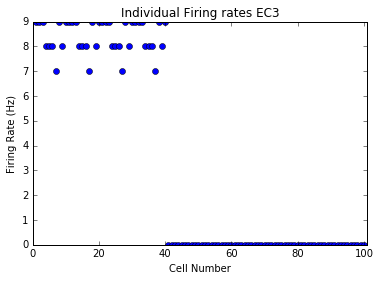

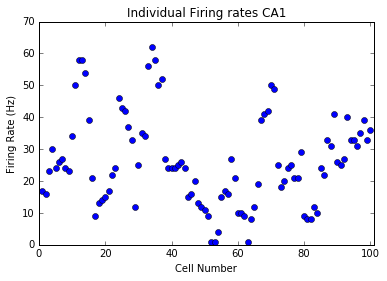

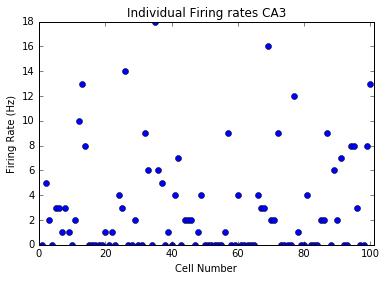

In [108]:
pylab.plot(range(1,len(EC3_spikes.count)+1),EC3_spikes.count/(10), 'bo')
pylab.title('Individual Firing rates EC3')
pylab.xlabel('Cell Number')
pylab.ylabel('Firing Rate (Hz)')
pylab.xlim(0,EC3_size+1)
#pylab.ylim(0,50)
pylab.show()



pylab.plot(range(1,len(CA1_spikes.count)+1),CA1_spikes.count/10, 'bo')
pylab.title('Individual Firing rates CA1')
pylab.xlabel('Cell Number')
pylab.ylabel('Firing Rate (Hz)')
pylab.xlim(0,CA1_size+1)
#pylab.ylim(0,50)
pylab.show()

pylab.plot(range(1,len(CA3_spikes.count)+1),CA3_spikes.count/10, 'bo')
pylab.title('Individual Firing rates CA3')
pylab.xlabel('Cell Number')
pylab.ylabel('Firing Rate (Hz)')
pylab.xlim(0,CA3_size+1)
#pylab.ylim(0,50)
pylab.show()


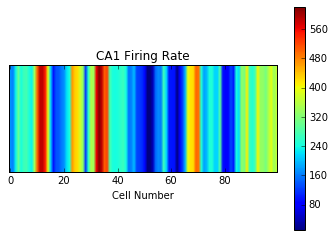

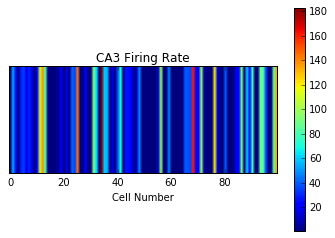

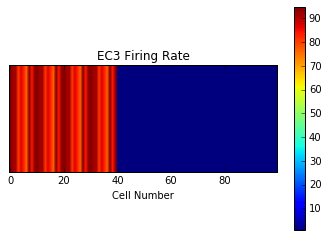

In [109]:
CA1_heatmap = np.broadcast_to(np.asarray(CA1_spikes.count), (2, 100) )
CA3_heatmap = np.broadcast_to(np.asarray(CA3_spikes.count), (2, 100) )
EC3_heatmap = np.broadcast_to(np.asarray(EC3_spikes.count), (2, 100) )

pylab.imshow(CA1_heatmap, aspect=20)
pylab.xlabel('Cell Number')
pylab.ylabel('')
pylab.yticks([])
pylab.title('CA1 Firing Rate')
pylab.colorbar()
pylab.show()

pylab.imshow(CA3_heatmap, aspect=20)
pylab.xlabel('Cell Number')
pylab.ylabel('')
pylab.yticks([])
pylab.title('CA3 Firing Rate')
pylab.colorbar()
pylab.show()

pylab.imshow(EC3_heatmap, aspect=20)
pylab.xlabel('Cell Number')
pylab.ylabel('')
pylab.yticks([])
pylab.title('EC3 Firing Rate')
pylab.colorbar()
pylab.show()


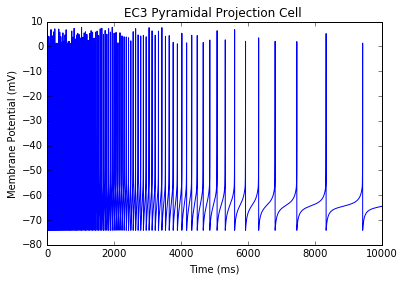

In [110]:
pylab.plot(EC3_state.t/ms,EC3_state.v[1]*1000)
pylab.title('EC3 Pyramidal Projection Cell ')
pylab.xlabel('Time (ms)')
pylab.ylabel('Membrane Potential (mV)')
pylab.show()

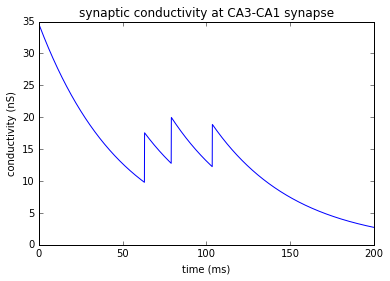

In [111]:
# plot synaptic conductivity
pylab.plot(CA1_state.t/ms,CA1_state.g_syn_CA3[4]/nS)
pylab.title('synaptic conductivity at CA3-CA1 synapse')
pylab.xlabel('time (ms)')
pylab.ylabel('conductivity (nS)')
pylab.xlim(0,200)
#pylab.ylim(0,50)
pylab.show()


## What happens without EC3?

In [112]:
# try setting EC3_CA1 flag to false 

EC3_CA1.active = False # performing a EC3 lesion hehe

sim.restore('External inputs added')
sim.run(1*second)

INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.06s, trying other methods took 0.04s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_2', using method 'euler' (took 0.01s, trying other methods took 0.03s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_3', using method 'euler' (took 0.02s, trying other methods took 0.04s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_4', using method 'euler' (took 0.02s, trying other methods took 0.04s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_5', using method 'euler' (took 0.01s, trying other methods took 0.03s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specifi

### Plot results

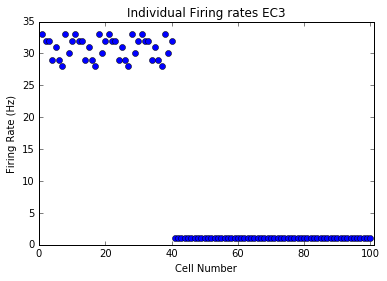

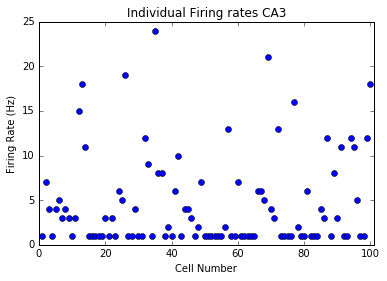

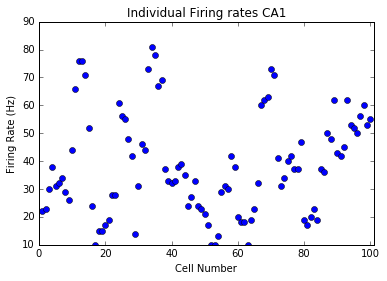

In [113]:
pylab.plot(range(1,len(EC3_spikes.count)+1),EC3_spikes.count, 'bo')
pylab.title('Individual Firing rates EC3')
pylab.xlabel('Cell Number')
pylab.ylabel('Firing Rate (Hz)')
pylab.xlim(0,EC3_size+1)
#pylab.ylim(0,50)
pylab.show()


pylab.plot(range(1,len(CA3_spikes.count)+1),CA3_spikes.count, 'bo')
pylab.title('Individual Firing rates CA3')
pylab.xlabel('Cell Number')
pylab.ylabel('Firing Rate (Hz)')
pylab.xlim(0,CA3_size+1)
#pylab.ylim(0,50)
pylab.show()

pylab.plot(range(1,len(CA1_spikes.count)+1),CA1_spikes.count, 'bo')
pylab.title('Individual Firing rates CA1')
pylab.xlabel('Cell Number')
pylab.ylabel('Firing Rate (Hz)')
pylab.xlim(0,CA1_size+1)
#pylab.ylim(0,50)
pylab.show()

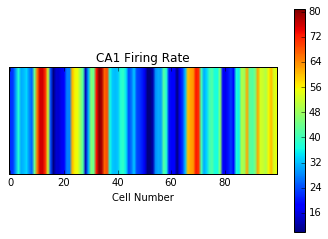

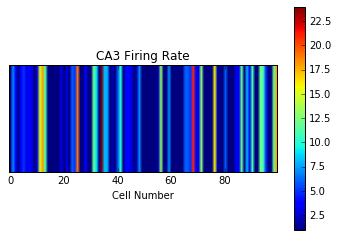

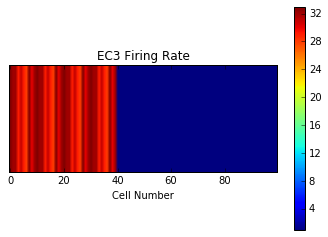

In [114]:
CA1_heatmap = np.broadcast_to(np.asarray(CA1_spikes.count), (2, 100) )
CA3_heatmap = np.broadcast_to(np.asarray(CA3_spikes.count), (2, 100) )
EC3_heatmap = np.broadcast_to(np.asarray(EC3_spikes.count), (2, 100) )

pylab.imshow(CA1_heatmap, aspect=20)
pylab.xlabel('Cell Number')
pylab.ylabel('')
pylab.yticks([])
pylab.title('CA1 Firing Rate')
pylab.colorbar()
pylab.show()

pylab.imshow(CA3_heatmap, aspect=20)
pylab.xlabel('Cell Number')
pylab.ylabel('')
pylab.yticks([])
pylab.title('CA3 Firing Rate')
pylab.colorbar()
pylab.show()

pylab.imshow(EC3_heatmap, aspect=20)
pylab.xlabel('Cell Number')
pylab.ylabel('')
pylab.yticks([])
pylab.title('EC3 Firing Rate')
pylab.colorbar()
pylab.show()

## What happens without CA3, but with EC3?

In [115]:

EC3_CA1.active = True # reconnecting EC3-CA1
CA3_CA1.active = False # lesioning CA3
sim.restore('External inputs added')
sim.run(1*second)

INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.06s, trying other methods took 0.04s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_2', using method 'euler' (took 0.01s, trying other methods took 0.03s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_3', using method 'euler' (took 0.02s, trying other methods took 0.04s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_4', using method 'euler' (took 0.02s, trying other methods took 0.04s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_5', using method 'euler' (took 0.01s, trying other methods took 0.03s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specifi

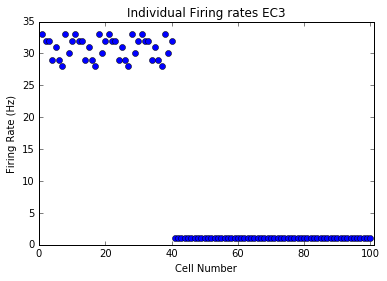

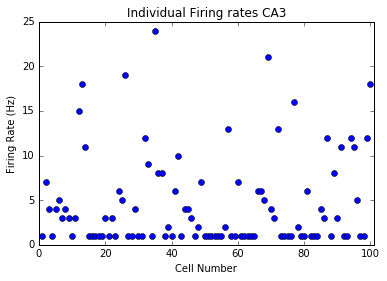

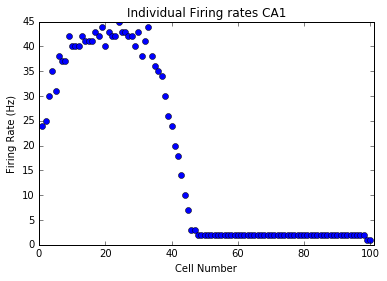

In [116]:
pylab.plot(range(1,len(EC3_spikes.count)+1),EC3_spikes.count, 'bo')
pylab.title('Individual Firing rates EC3')
pylab.xlabel('Cell Number')
pylab.ylabel('Firing Rate (Hz)')
pylab.xlim(0,EC3_size+1)
#pylab.ylim(0,50)
pylab.show()


pylab.plot(range(1,len(CA3_spikes.count)+1),CA3_spikes.count, 'bo')
pylab.title('Individual Firing rates CA3')
pylab.xlabel('Cell Number')
pylab.ylabel('Firing Rate (Hz)')
pylab.xlim(0,CA3_size+1)
#pylab.ylim(0,50)
pylab.show()

pylab.plot(range(1,len(CA1_spikes.count)+1),CA1_spikes.count, 'bo')
pylab.title('Individual Firing rates CA1')
pylab.xlabel('Cell Number')
pylab.ylabel('Firing Rate (Hz)')
pylab.xlim(0,CA1_size+1)
#pylab.ylim(0,50)
pylab.show()

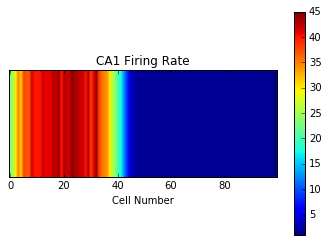

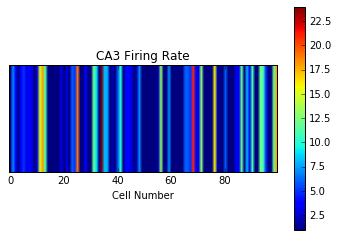

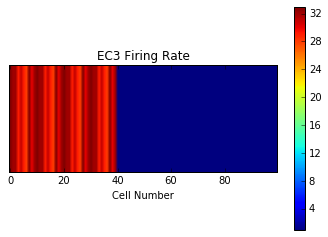

In [117]:
CA1_heatmap = np.broadcast_to(np.asarray(CA1_spikes.count), (2, 100) )
CA3_heatmap = np.broadcast_to(np.asarray(CA3_spikes.count), (2, 100) )
EC3_heatmap = np.broadcast_to(np.asarray(EC3_spikes.count), (2, 100) )

pylab.imshow(CA1_heatmap, aspect=20)
pylab.xlabel('Cell Number')
pylab.ylabel('')
pylab.yticks([])
pylab.title('CA1 Firing Rate')
pylab.colorbar()
pylab.show()

pylab.imshow(CA3_heatmap, aspect=20)
pylab.xlabel('Cell Number')
pylab.ylabel('')
pylab.yticks([])
pylab.title('CA3 Firing Rate')
pylab.colorbar()
pylab.show()

pylab.imshow(EC3_heatmap, aspect=20)
pylab.xlabel('Cell Number')
pylab.ylabel('')
pylab.yticks([])
pylab.title('EC3 Firing Rate')
pylab.colorbar()
pylab.show()

## Now let's see what happens with LTP 
* Only at the EC3-CA1 synapses

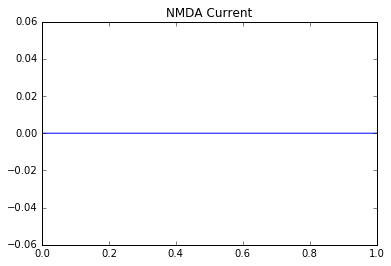

In [118]:
pylab.plot(CA1_state.t,CA1_state.I_NMDA[3])#, 'bo')
pylab.title('NMDA Current')
#pylab.xlabel('Cell Number')
#pylab.ylabel('Firing Rate (Hz)')
#pylab.xlim(0,EC3_size+1)
#pylab.ylim(0,50)
pylab.show()


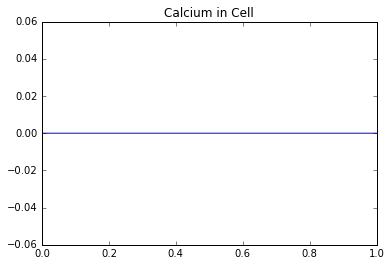

In [119]:
pylab.plot(CA1_state.t,CA1_state.Ca[3])#, 'bo')
pylab.title('Calcium in Cell')
#pylab.xlabel('Cell Number')
#pylab.ylabel('Firing Rate (Hz)')
#pylab.xlim(0,EC3_size+1)
#pylab.ylim(0,50)
pylab.show()